In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# 用 DataFrame 表示多變數資料

## 使用 NumPy 函數建立 DataFrame

In [4]:
pd.DataFrame(np.arange(1, 6)) # 建立一維陣列 (1-D array)

,0
0,1
1,2
2,3
3,4
4,5


In [5]:
df = pd.DataFrame(np.array([[10, 11], [20, 21]])) #建立二維陣列 (2-D array)

In [6]:
df

,0,1
0,10,11
1,20,21


## 行的名稱用 column 參數指定

In [7]:
df = pd.DataFrame(np.array([[70, 71], [90, 91]]),
                 columns = ['Taipei', 'Kaohsiung'])

In [8]:
df

,Taipei,Kaohsiung
0,70,71
1,90,91


## 使用 NumPy 函數建立 DataFrame(續)

### 基本資料確認

In [9]:
len(df)

2

In [10]:
df.shape

(2, 2)

### 搭配字典及序列建立 DataFrame

In [11]:
tempsTPE = [70,71]
tempsKAO = [90, 91]
temperatures = {'Taipei':tempsTPE, 'Kaohsiung':tempsKAO}
pd.DataFrame(temperatures)

,Taipei,Kaohsiung
0,70,90
1,71,91


### 可能的思考錯誤：以為先建串列後命名就可以做到

In [12]:
tempsTime0 = pd.Series([70, 90])
tempsTime1 = pd.Series([71, 91])
df = pd.DataFrame([tempsTime0, tempsTime1])
df

,0,1
0,70,90
1,71,91


In [13]:
df = pd.DataFrame([tempsTime0, tempsTime1],
                 columns = ['Taipei', 'Kaohsiung'])
df

,Taipei,Kaohsiung
0,NaN,NaN
1,NaN,NaN


### 可採取的作法 1

In [14]:
df = pd.DataFrame([tempsTime0, tempsTime1])
df.columns = ['Taipei', 'Kaohsiung']
df            

,Taipei,Kaohsiung
0,70,90
1,71,91


### 可採取的因應做法 2

In [15]:
tempsTPEseries = pd.Series(tempsTPE)
tempsKAOseries = pd.Series(tempsKAO)
df1 = pd.DataFrame({'Taipei':tempsTPEseries,
                   'Kaohsiung':tempsKAOseries})
df1

,Taipei,Kaohsiung
0,70,90
1,71,91


# 從 CSV 建立 DataFrame

### 讀取資料 & 基本屬性操作

In [16]:
sp500 = pd.read_csv("C:\\Users\\Owner\\Desktop\\108-2\\Python_進階\\sp500.csv",
                   index_col = 'Symbol',
                   usecols=[0, 2, 3, 7])
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [17]:
len(sp500)

500

In [18]:
type(sp500)

pandas.core.frame.DataFrame

In [19]:
sp500.shape

(500, 3)

In [20]:
sp500.size

1500

In [21]:
sp500.index

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ACT', 'ADBE', 'AES', 'AET', 'AFL',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=500)

In [22]:
sp500.columns

Index(['Sector', 'Price', 'Book Value'], dtype='object')

## 存取行列資料

In [23]:
sp500.Price

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

In [24]:
sp500['Price']

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

In [25]:
sp500.loc['ABT']

Sector        Health Care
Price                39.6
Book Value         15.573
Name: ABT, dtype: object

In [26]:
sp500.iloc[1]

Sector        Health Care
Price                39.6
Book Value         15.573
Name: ABT, dtype: object

In [27]:
sp500.loc[['ABT', 'ACE']]

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ACE,Financials,102.91,86.897


In [28]:
sp500.iloc[[1, 4]]

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ACE,Financials,102.91,86.897


In [29]:
ind1 = sp500.index.get_loc('ABBV')
ind2 = sp500.index.get_loc('ACE')
(ind1, ind2)

(2, 4)

## 存取 cell 資料 + [ ] 運算子切割 + 跨行列選取

In [30]:
sp500.at['ACE', 'Price']

102.91

In [31]:
sp500.iat[4, 1]

102.91

In [32]:
sp500[:8]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
ACT,Health Care,213.77,55.188
ADBE,Information Technology,64.30,13.262
AES,Utilities,13.61,5.781


In [33]:
sp500['ABBV':'ACT']

,Sector,Price,Book Value
Symbol,,,
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
ACT,Health Care,213.77,55.188


In [34]:
sp500.loc[['ABT', 'ZTS']][['Sector','Price']]

,Sector,Price
Symbol,,
ABT,Health Care,39.60
ZTS,Health Care,30.53


In [35]:
sp500['MMM':'ACT'][['Sector','Book Value']]

,Sector,Book Value
Symbol,,
MMM,Industrials,26.668
ABT,Health Care,15.573
ABBV,Health Care,2.954
ACN,Information Technology,8.326
ACE,Financials,86.897
ACT,Health Care,55.188


## 繼續用布林操作

In [36]:
sp500.Price < 50

Symbol
MMM     False
ABT      True
ABBV    False
ACN     False
ACE     False
        ...  
YHOO     True
YUM     False
ZMH     False
ZION     True
ZTS      True
Name: Price, Length: 500, dtype: bool

In [37]:
(sp500.Price < 50).head()

Symbol
MMM     False
ABT      True
ABBV    False
ACN     False
ACE     False
Name: Price, dtype: bool

In [38]:
sp500[(sp500.Price < 45) & (sp500.Price > 43)]

,Sector,Price,Book Value
Symbol,,,
ADM,Consumer Staples,43.56,30.569
CPB,Consumer Staples,44.06,5.067
KMX,Consumer Discretionary,44.70,14.963
CNX,Energy,44.43,22.157
L,Financials,43.16,50.885
PKI,Health Care,44.14,17.943
PCG,Utilities,44.72,31.620
PCL,Financials,43.65,10.096
SO,Utilities,43.08,21.407


In [39]:
sp500[(sp500.Price < 45) & (sp500.Price > 43)]['Price']

Symbol
ADM    43.56
CPB    44.06
KMX    44.70
CNX    44.43
L      43.16
PKI    44.14
PCG    44.72
PCL    43.65
SO     43.08
SWN    44.33
TYC    43.29
WM     43.37
Name: Price, dtype: float64

In [40]:
sp500[(sp500.Price < 45) & (sp500.Price > 43)]['Price'].count()

12

In [41]:
sp500[(sp500.Sector == 'Health Care') & (sp500.Price > 100.00) &
     (sp500.Price < 110.00)][['Price', 'Sector']]

,Price,Sector
Symbol,,
JNJ,100.98,Health Care
LH,100.75,Health Care
WAT,100.54,Health Care
WLP,108.82,Health Care
ZMH,101.84,Health Care


# 操控 DataFrame 的架構

## 回顧另存的概念與做法
### 重新命名(但是寫到另一個陣列)

In [42]:
newSP500 = sp500.rename(columns = {'Book Value':'BookValue'})

In [43]:
newSP500[:2]

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573


### 重新命名(但實質上是原地進行修改)

In [44]:
sp500.rename(columns = {'Book Value':'BookValue'},
            inplace = True)

In [45]:
sp500.columns

Index(['Sector', 'Price', 'BookValue'], dtype='object')

In [46]:
sp500['BookValue'][:5]

Symbol
MMM     26.668
ABT     15.573
ABBV     2.954
ACN      8.326
ACE     86.897
Name: BookValue, dtype: float64

In [47]:
sp500.BookValue[:5]

Symbol
MMM     26.668
ABT     15.573
ABBV     2.954
ACN      8.326
ACE     86.897
Name: BookValue, dtype: float64

## 進行 "行" 的新增 

### 利用 [ ] 及 .insert()

In [48]:
sp500C = sp500.copy()

In [49]:
sp500C['RoundPrice'] = sp500.Price.round() #四捨五入

In [50]:
sp500C[:3]

,Sector,Price,BookValue,RoundPrice
Symbol,,,,
MMM,Industrials,141.14,26.668,141.0
ABT,Health Care,39.60,15.573,40.0
ABBV,Health Care,53.95,2.954,54.0


 ### 另一種寫法

In [51]:
sp500C['RP'] = sp500['Price'].round()

In [52]:
sp500C.tail()

,Sector,Price,BookValue,RoundPrice,RP
Symbol,,,,,
YHOO,Information Technology,35.02,12.768,35.0,35.0
YUM,Consumer Discretionary,74.77,5.147,75.0,75.0
ZMH,Health Care,101.84,37.181,102.0,102.0
ZION,Financials,28.43,30.191,28.0,28.0
ZTS,Health Care,30.53,2.150,31.0,31.0


In [53]:
sp500C.insert(2, 'RPrice', sp500.Price.round()+1)

In [54]:
sp500C.head(3)

,Sector,Price,RPrice,BookValue,RoundPrice,RP
Symbol,,,,,,
MMM,Industrials,141.14,142.0,26.668,141.0,141.0
ABT,Health Care,39.60,41.0,15.573,40.0,40.0
ABBV,Health Care,53.95,55.0,2.954,54.0,54.0


### 新增一行並設定初始值為0

In [55]:
ss = sp500[4: 10].copy()
ss.loc[:, 'PER'] = 0
ss

,Sector,Price,BookValue,PER
Symbol,,,,
ACE,Financials,102.91,86.897,0
ACT,Health Care,213.77,55.188,0
ADBE,Information Technology,64.30,13.262,0
AES,Utilities,13.61,5.781,0
AET,Health Care,76.39,40.021,0
AFL,Financials,61.31,34.527,0


In [56]:
np.random.seed(12345)
ss.loc[:,'PER'] = pd.Series(np.random.normal(size=6),
                           index = ss.index)
ss

,Sector,Price,BookValue,PER
Symbol,,,,
ACE,Financials,102.91,86.897,-0.204708
ACT,Health Care,213.77,55.188,0.478943
ADBE,Information Technology,64.30,13.262,-0.519439
AES,Utilities,13.61,5.781,-0.555730
AET,Health Care,76.39,40.021,1.965781
AFL,Financials,61.31,34.527,1.393406


## 利用串聯增加新行 concat() & round()

In [57]:
roundedPrice = pd.DataFrame({'RoundedPrice':
                            sp500.Price.round()})
concat1 = pd.concat([sp500, roundedPrice], axis=1)
concat1[2:4]

,Sector,Price,BookValue,RoundedPrice
Symbol,,,,
ABBV,Health Care,53.95,2.954,54.0
ACN,Information Technology,79.79,8.326,80.0


In [58]:
roundedPrice = pd.DataFrame({'Price':sp500.Price.round()})
roundedPrice[:3]

,Price
Symbol,
MMM,141.0
ABT,40.0
ABBV,54.0


## 到底欄位名重疊會不會出現意外？

In [59]:
dups = pd.concat([sp500, roundedPrice], axis=1)
dups[:3]

,Sector,Price,BookValue,Price
Symbol,,,,
MMM,Industrials,141.14,26.668,141.0
ABT,Health Care,39.60,15.573,40.0
ABBV,Health Care,53.95,2.954,54.0


In [60]:
dups.Price[1:4]

,Price,Price
Symbol,,
ABT,39.60,40.0
ABBV,53.95,54.0
ACN,79.79,80.0


## 改變 "行" 的內容

### 先從反轉 "行" 順序開始(但無法原地改)

In [61]:
revColName = sp500.columns[::-1]

In [62]:
sp500[revColName][:3]

,BookValue,Price,Sector
Symbol,,,
MMM,26.668,141.14,Industrials
ABT,15.573,39.60,Health Care
ABBV,2.954,53.95,Health Care


### 取代 "行" 的內容

In [63]:
sp500C1 = sp500.copy()

In [64]:
sp500C1.Price = roundedPrice.Price
sp500C1[2:4]

,Sector,Price,BookValue
Symbol,,,
ABBV,Health Care,54.0,2.954
ACN,Information Technology,80.0,8.326


In [65]:
sp500C1.loc[:,'Price'] = roundedPrice.Price
sp500C1[2:4]

,Sector,Price,BookValue
Symbol,,,
ABBV,Health Care,54.0,2.954
ACN,Information Technology,80.0,8.326


### 用 del 刪除

In [66]:
del sp500C1['Price']

In [67]:
sp500C1.head(3)

,Sector,BookValue
Symbol,,
MMM,Industrials,26.668
ABT,Health Care,15.573
ABBV,Health Care,2.954


### 用 .pop() 刪除

In [68]:
popped = sp500C1.pop('Sector')
sp500C1.head(2)

,BookValue
Symbol,
MMM,26.668
ABT,15.573


### 用.drop()刪除(使用前記得先回到原狀態..否則無物可刪了)

In [69]:
sp500C1 = sp500.copy()
sp500C1.Price = roundedPrice.Price
afterDrop = sp500C1.drop(['BookValue'], axis=1)
afterDrop[2:4]

,Sector,Price
Symbol,,
ABBV,Health Care,54.0
ACN,Information Technology,80.0


# 行列的重新組合
## 一個 DF 取 0 1 2 三列 & 另一個取 10 6 2 三列
## 看看如果第二列重複會發生啥事

In [70]:
df1 = sp500.iloc[0:3].copy()
df2 = sp500.iloc[[10, 6, 2]]
testDF = df1.append(df2)
testDF

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
A,Health Care,56.18,16.928
ADBE,Information Technology,64.30,13.262
ABBV,Health Care,53.95,2.954


In [71]:
df3 = pd.DataFrame(0.0, index=df1.index, columns=['PER'])
df3

,PER
Symbol,
MMM,0.0
ABT,0.0
ABBV,0.0


In [72]:
df1.append(df3)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,BookValue,PER,Price,Sector
Symbol,,,,
MMM,26.668,NaN,141.14,Industrials
ABT,15.573,NaN,39.60,Health Care
ABBV,2.954,NaN,53.95,Health Care
MMM,NaN,0.0,NaN,NaN
ABT,NaN,0.0,NaN,NaN
ABBV,NaN,0.0,NaN,NaN


In [73]:
df1.append(df3, ignore_index = True)

,BookValue,PER,Price,Sector
0,26.668,NaN,141.14,Industrials
1,15.573,NaN,39.60,Health Care
2,2.954,NaN,53.95,Health Care
3,NaN,0.0,NaN,NaN
4,NaN,0.0,NaN,NaN
5,NaN,0.0,NaN,NaN


In [74]:
df1 = sp500.iloc[0:3].copy()

In [75]:
df2 = sp500.iloc[[10, 6, 2]]

In [77]:
pd.concat([df1, df2])

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
A,Health Care,56.18,16.928
ADBE,Information Technology,64.30,13.262
ABBV,Health Care,53.95,2.954


In [78]:
df2_2 = df2.copy()

In [79]:
df2_2.insert(3, 'FU', pd.Series(0, index = df2.index))

In [80]:
df2_2

,Sector,Price,BookValue,FU
Symbol,,,,
A,Health Care,56.18,16.928,0
ADBE,Information Technology,64.30,13.262,0
ABBV,Health Care,53.95,2.954,0


In [81]:
pd.concat([df1, df2_2])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,BookValue,FU,Price,Sector
Symbol,,,,
MMM,26.668,NaN,141.14,Industrials
ABT,15.573,NaN,39.60,Health Care
ABBV,2.954,NaN,53.95,Health Care
A,16.928,0.0,56.18,Health Care
ADBE,13.262,0.0,64.30,Information Technology
ABBV,2.954,0.0,53.95,Health Care


In [83]:
r = pd.concat([df1, df2_2], keys=['df1', 'df2'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [84]:
r

BookValue   FU   Price                  Sector
    Symbol                                                
df1 MMM        26.668  NaN  141.14             Industrials
    ABT        15.573  NaN   39.60             Health Care
    ABBV        2.954  NaN   53.95             Health Care
df2 A          16.928  0.0   56.18             Health Care
    ADBE       13.262  0.0   64.30  Information Technology
    ABBV        2.954  0.0   53.95             Health Care

In [85]:
selected = sp500.Price > 300
(len(selected), selected.sum(), selected.count())

(500, 10, 500)

In [86]:
priceLessThan300 = sp500[~selected]
priceLessThan300.head()

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [87]:
priceLessThan300.count()

Sector       490
Price        490
BookValue    489
dtype: int64

In [88]:
priceLessThan300.Price.count()

490

## 真假複製

In [89]:
onlyFirst3 = sp500[:3]

In [90]:
onlyFirst3

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


In [91]:
onlyFirst3 = sp500[:3].copy()

In [92]:
onlyFirst3

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


## 階層式索引

In [94]:
reindexed = sp500.reset_index()

In [95]:
multiFi = reindexed.set_index(['Sector', 'Symbol'])

In [96]:
multiFi[:5]

Price  BookValue
Sector                 Symbol                   
Industrials            MMM     141.14     26.668
Health Care            ABT      39.60     15.573
                       ABBV     53.95      2.954
Information Technology ACN      79.79      8.326
Financials             ACE     102.91     86.897

In [98]:
type(multiFi.index)

pandas.core.indexes.multi.MultiIndex

In [99]:
len(multiFi.index.levels)

2

In [101]:
multiFi.index.levels[0]

Index(['Consumer Discretionary', 'Consumer Discretionary ', 'Consumer Staples',
       'Consumer Staples ', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Industries', 'Information Technology', 'Materials',
       'Telecommunications Services', 'Utilities'],
      dtype='object', name='Sector')

In [102]:
multiFi.index.levels[1]

Index(['A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACE', 'ACN', 'ACT', 'ADBE',
       ...
       'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YHOO', 'YUM', 'ZION', 'ZMH',
       'ZTS'],
      dtype='object', name='Symbol', length=500)

In [103]:
multiFi.index.get_level_values(0)

Index(['Industrials', 'Health Care', 'Health Care', 'Information Technology',
       'Financials', 'Health Care', 'Information Technology', 'Utilities',
       'Health Care', 'Financials',
       ...
       'Utilities', 'Information Technology', 'Information Technology',
       'Financials', 'Industrials', 'Information Technology',
       'Consumer Discretionary', 'Health Care', 'Financials', 'Health Care'],
      dtype='object', name='Sector', length=500)

In [104]:
multiFi.xs('Industrials')[:5]

,Price,BookValue
Symbol,,
MMM,141.14,26.668
ALLE,52.46,0.000
APH,95.71,18.315
AVY,48.20,15.616
BA,132.41,19.870


In [105]:
multiFi.xs('APH', level=1)

,Price,BookValue
Sector,,
Industrials,95.71,18.315


In [111]:
multiFi.xs('Industrials','UPS')

ValueError: No axis named UPS for object type <class 'pandas.core.frame.DataFrame'>

# 類別資料的應用

## 建立統計上的類別變數

### 使用.Categorical()

In [3]:
import pandas as pd
Imh_values= ["low", "high", "medium", "medium", "high"]
Imh_cat = pd.Categorical(Imh_values)
Imh_cat

[low, high, medium, medium, high]
Categories (3, object): [high, low, medium]

In [4]:
Imh_cat.categories

Index(['high', 'low', 'medium'], dtype='object')

In [5]:
Imh_cat.get_values()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


array(['low', 'high', 'medium', 'medium', 'high'], dtype=object)

In [6]:
Imh_cat.codes

array([1, 0, 2, 2, 0], dtype=int8)

### 重建編碼的合理順序

In [7]:
Imh_cat = pd.Categorical(Imh_values,
                        categories =["low", "medium", "high"])

In [9]:
Imh_cat

[low, high, medium, medium, high]
Categories (3, object): [low, medium, high]

Imh_cat.codes

In [10]:
Imh_cat.get_values()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


array(['low', 'high', 'medium', 'medium', 'high'], dtype=object)

In [11]:
Imh_cat.sort_values()

[low, medium, medium, high, high]
Categories (3, object): [low, medium, high]

### 利用 .astype 的作法 & 用 .cat 來讀取

In [12]:
cat_series = pd.Series(Imh_values, dtype="category")

In [13]:
cat_series

0       low
1      high
2    medium
3    medium
4      high
dtype: category
Categories (3, object): [high, low, medium]

In [14]:
s = pd.Series(Imh_values)

In [15]:
asCat = s.astype("category")

In [16]:
asCat

0       low
1      high
2    medium
3    medium
4      high
dtype: category
Categories (3, object): [high, low, medium]

In [17]:
cat_series.cat.categories

Index(['high', 'low', 'medium'], dtype='object')

# 用其他 pd 函式產生類別物件

## 用 .cut() 

In [20]:
import numpy as np
np.random.seed(12345)
values = np.random.randint(0, 100, 5)
bins = pd.DataFrame({"Values":values})
bins

,Values
0,98
1,29
2,1
3,36
4,41


In [21]:
bins['Group'] = pd.cut(values, range(0, 101, 10))
bins

,Values,Group
0,98,"(90, 100]"
1,29,"(20, 30]"
2,1,"(0, 10]"
3,36,"(30, 40]"
4,41,"(40, 50]"


In [22]:
bins.Group

0    (90, 100]
1     (20, 30]
2      (0, 10]
3     (30, 40]
4     (40, 50]
Name: Group, dtype: category
Categories (10, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [27]:
metal_values = ["bronze", "gold", "silver", "bronze"]
metal_categories = ["bronze", "silver", "gold"]
metals = pd.Categorical(metal_values,
                       categories = metal_categories, ordered = True)
metals

[bronze, gold, silver, bronze]
Categories (3, object): [bronze < silver < gold]

In [28]:
metals_reversed_values = pd.Categorical(metals.get_values()[::-1],
                                       categories=metals.categories, ordered =True)
metals_reversed_values

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


[bronze, silver, gold, bronze]
Categories (3, object): [bronze < silver < gold]

In [29]:
metals <= metals_reversed_values
metals.codes

array([0, 2, 1, 0], dtype=int8)

In [30]:
metals_reversed_values.codes

array([0, 1, 2, 0], dtype=int8)

### 當指定不存在的類別時... 看看會出現啥情況

In [31]:
pd.Categorical(["bronze", "copper"], categories = metal_categories)

[bronze, NaN]
Categories (3, object): [bronze, silver, gold]

# 類別物件的敘述性統計資訊

In [32]:
metals.describe()

,counts,freqs
categories,,
bronze,2,0.50
silver,1,0.25
gold,1,0.25


In [33]:
metals.value_counts()

bronze    2
silver    1
gold      1
dtype: int64

In [34]:
(metals.min(), metals.max(), metals.mode())

('bronze', 'gold', [bronze]
 Categories (3, object): [bronze < silver < gold])

In [35]:
metals.mode()

[bronze]
Categories (3, object): [bronze < silver < gold]

In [36]:
metals.min()

'bronze'

In [37]:
metals.max()

'gold'

# 小案例：成績處理

In [40]:
np.random.seed(123)
names = ['Eve', 'Norris', 'Rose', 'Lane', 'Sky', 'Handsome', 'Dave', 
         'Katina', 'Alice', 'Mark']
grades = np.random.randint(50, 101, len(names))
scores = pd.DataFrame({'Name':names, 'Grade':grades})
scores

,Name,Grade
0,Eve,95
1,Norris,52
2,Rose,78
3,Lane,84
4,Sky,88
5,Handsome,67
6,Dave,69
7,Katina,92
8,Alice,72
9,Mark,83


In [44]:
score_bins = [0, 59, 62,66, 69, 72, 76, 79, 82, 86, 89, 92, 99, 100]
letter_grades = ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+',
                'A-', 'A', 'A+']
letter_cats = pd.cut(scores.Grade, score_bins,
                    labels = letter_grades)
scores['Letter'] = letter_cats
scores

,Name,Grade,Letter
0,Eve,95,A
1,Norris,52,F
2,Rose,78,C+
3,Lane,84,B
4,Sky,88,B+
5,Handsome,67,D+
6,Dave,69,D+
7,Katina,92,A-
8,Alice,72,C-
9,Mark,83,B


In [45]:
letter_cats.head()

0     A
1     F
2    C+
3     B
4    B+
Name: Grade, dtype: category
Categories (13, object): [F < D- < D < D+ ... B+ < A- < A < A+]

In [47]:
scores.Letter.value_counts().head()

B     2
D+    2
A     1
A-    1
B+    1
Name: Letter, dtype: int64

In [48]:
scores.sort_values(by=['Letter'], ascending=False)

,Name,Grade,Letter
0,Eve,95,A
7,Katina,92,A-
4,Sky,88,B+
3,Lane,84,B
9,Mark,83,B
2,Rose,78,C+
8,Alice,72,C-
5,Handsome,67,D+
6,Dave,69,D+
1,Norris,52,F


In [49]:
scores.sort_values(by=['Letter'],
                  ascending=False).Letter.value_counts().head()

B     2
D+    2
A     1
A-    1
B+    1
Name: Letter, dtype: int64

# 35 基礎數值與統計

## 資料重來：重新載入兩個 csv 檔

In [1]:
import pandas as pd
sp500 = pd.read_csv('C:\\Users\\Owner\\Desktop\\108-2\\Python_進階\\sp500.csv', index_col='Symbol',
                    usecols = [0, 2, 3, 7])
omh = pd.read_csv('C:\\Users\\Owner\\Desktop\\108-2\\Python_進階\\omh.csv')

## 行列的算術運算

In [2]:
import numpy as np
np.random.seed(123)
df = pd.DataFrame(np.random.randn(5, 4),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


In [3]:
df * 2

,A,B,C,D
0,-2.171261,1.994691,0.565957,-3.012589
1,-1.157201,3.302873,-4.853358,-0.857825
2,2.531873,-1.733481,-1.357772,-0.189418
3,2.982779,-1.277804,-0.887964,-0.868703
4,4.411860,4.373572,2.008108,0.772373


In [4]:
s = df.iloc[0]
diff = df -s
diff

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.507030,0.654091,-2.709658,1.077382
2,2.351567,-1.864086,-0.961865,1.411586
3,2.577020,-1.636247,-0.726960,1.071943
4,3.291561,1.189441,0.721075,1.892481


In [5]:
s

A   -1.085631
B    0.997345
C    0.282978
D   -1.506295
Name: 0, dtype: float64

In [6]:
diff2 = s - df
diff2

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.507030,-0.654091,2.709658,-1.077382
2,-2.351567,1.864086,0.961865,-1.411586
3,-2.577020,1.636247,0.726960,-1.071943
4,-3.291561,-1.189441,-0.721075,-1.892481


In [7]:
s2 = s[1:3]
s2

B    0.997345
C    0.282978
Name: 0, dtype: float64

In [8]:
s2['E'] = 0
s2

B    0.997345
C    0.282978
E    0.000000
Name: 0, dtype: float64

In [9]:
df + s2

,A,B,C,D,E
0,NaN,1.994691,0.565957,NaN,NaN
1,NaN,2.648782,-2.143701,NaN,NaN
2,NaN,0.130605,-0.395908,NaN,NaN
3,NaN,0.358443,-0.161003,NaN,NaN
4,NaN,3.184132,1.287032,NaN,NaN


In [10]:
subframe = df[1:4][['B', 'C']]
subframe

,B,C
1,1.651437,-2.426679
2,-0.866740,-0.678886
3,-0.638902,-0.443982


In [11]:
df - subframe

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN
2,NaN,0.0,0.0,NaN
3,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN


In [12]:
a_col = df['A']
df.sub(a_col, axis = 0)

,A,B,C,D
0,0.0,2.082976,1.368609,-0.420664
1,0.0,2.230037,-1.848079,0.149688
2,0.0,-2.132677,-1.944822,-1.360645
3,0.0,-2.130292,-1.935372,-1.925741
4,0.0,-0.019144,-1.201876,-1.819744


# 數值讀取和尋找

## NaN 不計算在內 & nunique()

In [14]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s

0      a
1      a
2      b
3      c
4    NaN
dtype: object

In [15]:
s.count()

4

In [16]:
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

In [17]:
s.nunique()

3

## dropna = drop Nan

In [18]:
s.nunique(dropna = False)

4

In [20]:
s.value_counts(dropna = False)

a      2
b      1
c      1
NaN    1
dtype: int64

## 傳回索引或傳回結果

In [22]:
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

In [23]:
omh[['MSFT', 'AAPL']].max()

MSFT     48.84
AAPL    115.93
dtype: float64

In [27]:
omh[['MSFT', 'AAPL']].idxmin()

MSFT    11
AAPL    11
dtype: int64

In [28]:
omh[['MSFT', 'AAPL']].idxmax()

MSFT    3
AAPL    2
dtype: int64

## 找出 N 個和累計

In [31]:
omh.nsmallest(4, ['MSFT'])['MSFT']

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

In [33]:
omh.nlargest(4, ['MSFT'])['MSFT']

3     48.84
0     48.62
1     48.46
16    48.45
Name: MSFT, dtype: float64

In [34]:
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

In [35]:
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

# 相關敘述統計量的取得

In [36]:
omh.describe()

,MSFT,AAPL
count,22.000000,22.000000
mean,47.493182,112.411364
std,0.933077,2.388772
min,45.160000,106.750000
25%,46.967500,111.660000
50%,47.625000,112.530000
75%,48.125000,114.087500
max,48.840000,115.930000


In [37]:
omh.MSFT.describe()

count    22.000000
mean     47.493182
std       0.933077
min      45.160000
25%      46.967500
50%      47.625000
75%      48.125000
max      48.840000
Name: MSFT, dtype: float64

In [38]:
omh['MSFT'].describe()

count    22.000000
mean     47.493182
std       0.933077
min      45.160000
25%      46.967500
50%      47.625000
75%      48.125000
max      48.840000
Name: MSFT, dtype: float64

In [39]:
omh.MSFT.describe()['mean']

47.49318181818182

In [40]:
s=pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [41]:
omh.mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [42]:
omh.mean(axis = 1)[:5] #axis =0 行 vs. axis = 1 列

0    81.845
1    81.545
2    82.005
3    82.165
4    81.710
dtype: float64

In [43]:
omh.median()

MSFT     47.625
AAPL    112.530
dtype: float64

## 當眾數不只一個時

In [44]:
s = pd.Series([1, 2, 3, 3, 5])
s.mode()

0    3
dtype: int64

In [46]:
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode() # mode()求眾數

0    1
1    3
dtype: int64

In [47]:
omh.var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [48]:
omh.std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

## 計算共變數和相關係數

In [49]:
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

In [50]:
omh.MSFT.corr(omh.AAPL)

0.8641560684381169

# 離散程度的衡量

## 先初始化設定一下隨機數

In [51]:
np.random.seed(1234)
dist = np.random.normal(size = 10000)
dist

array([ 0.47143516, -1.19097569,  1.43270697, ..., -1.05246069,
       -0.4976931 , -0.2560062 ])

In [52]:
(dist.mean(), dist.std())

(0.01612646004719804, 0.9951799055939214)

## 把數字分配到大小相同的分群 & 建立對應關係

In [53]:
bins = pd.cut(dist, 5)
bins

[(0.42, 1.854], (-2.447, -1.013], (0.42, 1.854], (-1.013, 0.42], (-1.013, 0.42], ..., (-2.447, -1.013], (-1.013, 0.42], (-2.447, -1.013], (-1.013, 0.42], (-1.013, 0.42]]
Length: 10000
Categories (5, interval[float64]): [(-3.888, -2.447] < (-2.447, -1.013] < (-1.013, 0.42] < (0.42, 1.854] < (1.854, 3.288]]

In [54]:
bins.categories

IntervalIndex([(-3.888, -2.447], (-2.447, -1.013], (-1.013, 0.42], (0.42, 1.854], (1.854, 3.288]],
              closed='right',
              dtype='interval[float64]')

In [55]:
bins.codes

array([3, 1, 3, ..., 1, 2, 2], dtype=int8)

In [56]:
pd.cut(dist, 5, right=False).categories

IntervalIndex([[-3.881, -2.447), [-2.447, -1.013), [-1.013, 0.42), [0.42, 1.854), [1.854, 3.295)],
              closed='left',
              dtype='interval[float64]')

In [57]:
np.random.seed(123)
ages = np.random.randint(6, 45, 50)
ages

array([ 8, 34, 40, 44, 23, 25, 28, 39, 38, 15, 38, 38, 31, 25, 20, 42, 38,
       22, 10,  9,  8, 26,  8, 26, 13, 41, 34, 44, 39, 27, 36, 33, 40, 39,
       18,  9, 11,  6, 17, 40, 16, 28, 19, 24, 42, 21, 33, 36, 12, 32])

In [63]:
ranges=[6, 12, 18, 35, 50] #6-12 不含6 包含12
agebins = pd.cut(ages, ranges)
agebins.describe()

,counts,freqs
categories,,
"(6.0, 12.0]",8,0.16
"(12.0, 18.0]",5,0.10
"(18.0, 35.0]",19,0.38
"(35.0, 50.0]",17,0.34
NaN,1,0.02


In [64]:
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

,counts,freqs
categories,,
Youth,8,0.16
Young Adult,5,0.10
Adult,19,0.38
Middle Aged,17,0.34
NaN,1,0.02


## 創造五分位數

In [65]:
qbin = pd.qcut(dist, 5)
qbin.describe()

,counts,freqs
categories,,
"(-3.8819999999999997, -0.823]",2000,0.2
"(-0.823, -0.23]",2000,0.2
"(-0.23, 0.277]",2000,0.2
"(0.277, 0.853]",2000,0.2
"(0.853, 3.288]",2000,0.2


## 指定分位數範圍

In [66]:
quantiles = [0, 0.001, 0.021, 0.5-0.341, 0.5,
             0.5+0.341, 1.0-0.021, 1.0-0.001, 1.0]
qbin = pd.qcut(dist, quantiles)
qbin.describe()

,counts,freqs
categories,,
"(-3.8819999999999997, -3.151]",10,0.001
"(-3.151, -2.008]",200,0.020
"(-2.008, -0.971]",1380,0.138
"(-0.971, 0.0181]",3410,0.341
"(0.0181, 1.018]",3410,0.341
"(1.018, 2.012]",1380,0.138
"(2.012, 2.904]",200,0.020
"(2.904, 3.288]",10,0.001


## 資料順序計算

In [67]:
np.random.seed(12345)
s=pd.Series(np.random.np.random.randn(5),
           index=list('abcde'))
s

a   -0.204708
b    0.478943
c   -0.519439
d   -0.555730
e    1.965781
dtype: float64

In [68]:
s.rank()

a    3.0
b    4.0
c    2.0
d    1.0
e    5.0
dtype: float64

## 變動百分比及平移運算

In [69]:
omh[['MSFT']].pct_change()[3:10]

,MSFT
3,0.015807
4,-0.008600
5,-0.014870
6,-0.002306
7,-0.014499
8,0.005757
9,-0.004664


In [70]:
np.random.seed(1234)
s = pd.Series(np.random.randn(1000)).cumsum()
s[:5]

0    0.471435
1   -0.719541
2    0.713166
3    0.400515
4   -0.320074
dtype: float64

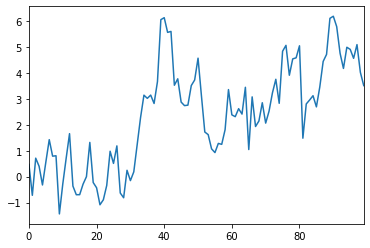

In [72]:
import matplotlib.pyplot as plt
s[0:100].plot()

In [74]:
r = s.rolling(window = 3)
r

Rolling [window=3,center=False,axis=0]

In [75]:
means = r.mean()

In [77]:
means[:7]

0         NaN
1         NaN
2    0.155020
3    0.131380
4    0.264536
5    0.215843
6    0.557897
dtype: float64

In [78]:
means[4:10]

4    0.264536
5    0.215843
6    0.557897
7    0.927973
8    1.007560
9    0.053056
dtype: float64

In [79]:
s[0:3].mean()

0.15502035673688253

In [80]:
s[1:4].mean()

0.13138014927952252

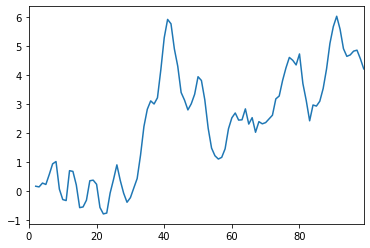

In [81]:
means[0:100].plot()

## 隨機取樣

In [82]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

,0,1,2,3
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906


## 利用 sample() 指定要提取的樣本數

In [83]:
df.sample(n=3)
df.sample(frac=0.1) #取 10% 的列
df.sample(frac=0.1, replace=True) #取後是否放回

,0,1,2,3
1,-0.720589,0.887163,0.859588,-0.636524
3,0.953324,-2.021255,-0.334077,0.002118
39,-2.123620,-0.333502,-0.886719,0.334198
3,0.953324,-2.021255,-0.334077,0.002118
45,-2.147855,-1.347533,0.363565,-0.014752
